In [12]:
# for this notebook make the path in the same folder (currently is in the project folder)
import os
import sys
import importlib

# Add the path to the val03 folder to sys.path so modules in the same folder can be imported
sys.path.append(os.path.join('notebooks', '201 not polynomical'))

In [13]:
from scripts import style
importlib.reload(style)
style.set_style()

c:\Users\herie\GitHub\Proyectos\En Pausa\Estimacion de Tendencia\notebooks\201 not polynomical\py201.py:61: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, progress=False)


Loaded AAPL from 2010-01-04 to 2025-11-28 (N=4002, log=True).
Split: N_train=2401, N_val=800, N_test=801
Best alpha* ≈ 0.3466, J_min ≈ 3.020239e-02


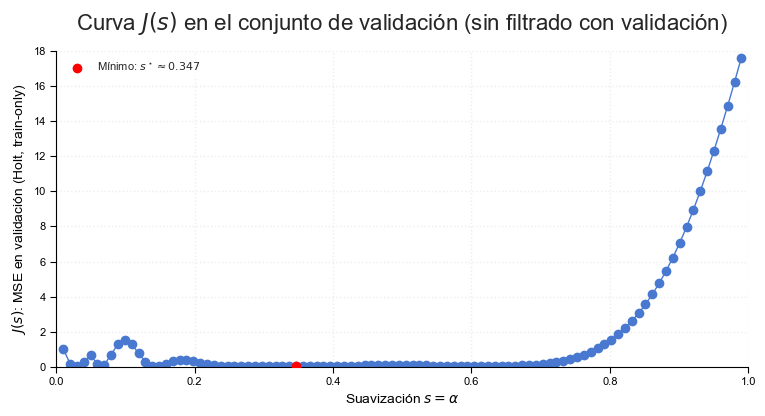

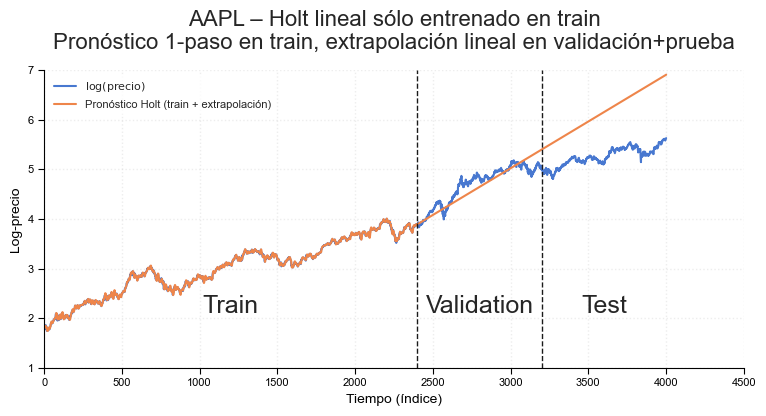

In [15]:
import py201
importlib.reload(py201)
py201.main(ticker="AAPL")

c:\Users\herie\GitHub\Proyectos\En Pausa\Estimacion de Tendencia\notebooks\201 not polynomical\holt_winters.py:66: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, progress=False)


Loaded NVDA from 2010-01-04 to 2025-11-28 (N=4002, log=True).
Split: N_train=2401, N_val=800, N_test=801
Best (alpha*, m*): alpha* ≈ 0.7858, m* = 390, J_min ≈ 6.161383e-02


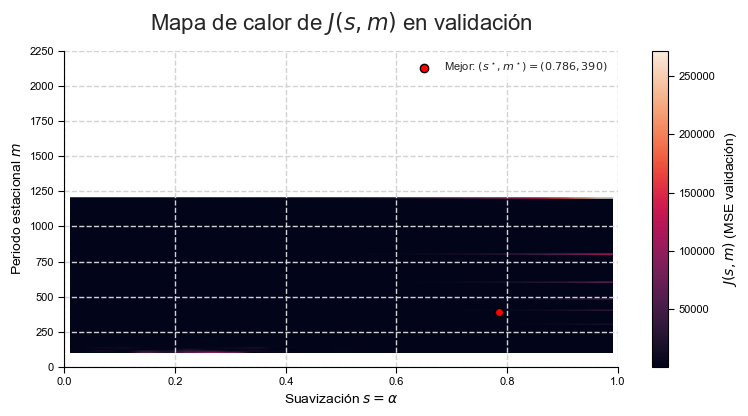

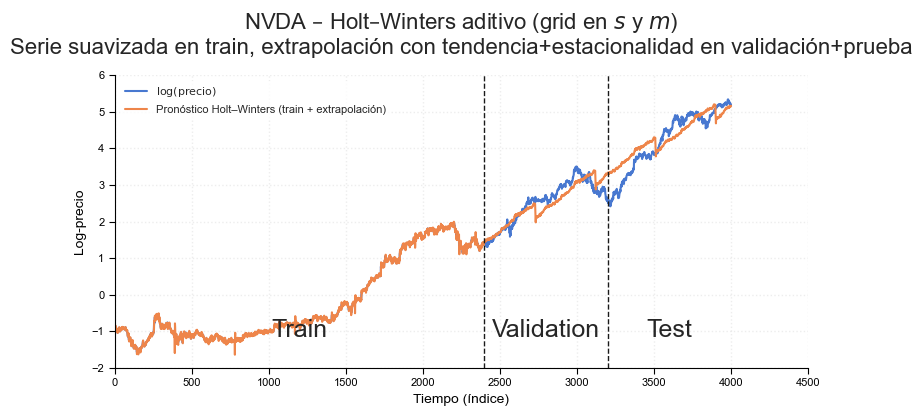

In [34]:
import holt_winters as hw
importlib.reload(hw)

# create a season_grid from 1 to 2000 with step 100
season_grid = tuple(range(100, 2001, 10))

hw.main(
    ticker="NVDA",
    start="2010-01-01",
    season_grid=season_grid,
    gamma=0.8,
)


c:\Users\herie\GitHub\Proyectos\En Pausa\Estimacion de Tendencia\notebooks\201 not polynomical\holt_winters.py:66: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, progress=False)


Loaded AAPL from 2010-01-04 to 2025-11-28 (N=4002, log=True).
Split: N_train=2401, N_val=800, N_test=801
Best (alpha*, m*): alpha* ≈ 0.7042, m* = 260, J_min ≈ 2.643008e-02


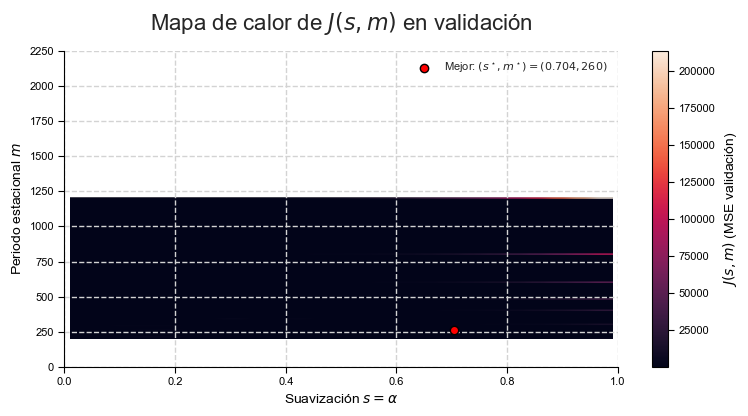

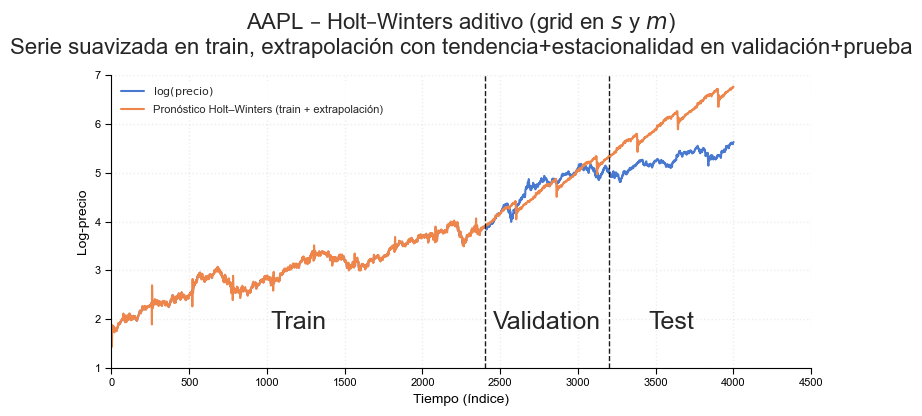

In [33]:
season_grid = tuple(range(200, 2001, 10))


hw.main(
    ticker="AAPL",
    start="2010-01-01",
    season_grid=season_grid,
    gamma=0.8,
)


c:\Users\herie\GitHub\Proyectos\En Pausa\Estimacion de Tendencia\notebooks\201 not polynomical\holt_winters.py:66: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, progress=False)


Loaded ^GSPC from 2010-01-04 to 2025-11-28 (N=4002, log=True).
Split: N_train=2401, N_val=800, N_test=801
Best (alpha*, m*): alpha* ≈ 0.6633, m* = 510, J_min ≈ 4.183607e-03


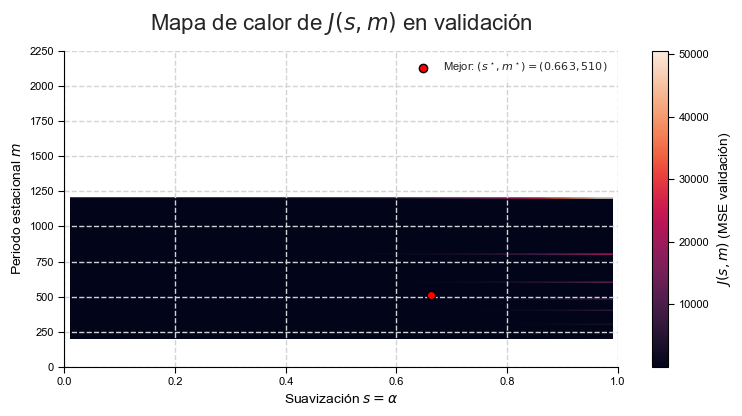

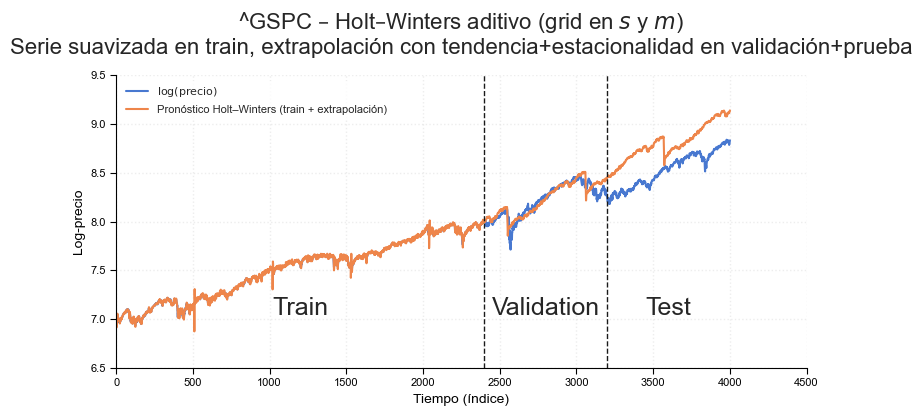

In [32]:
season_grid = tuple(range(200, 2001, 10))

hw.main(
    ticker="^GSPC",
    start="2010-01-01",
    season_grid=season_grid,
    gamma=0.8,
)

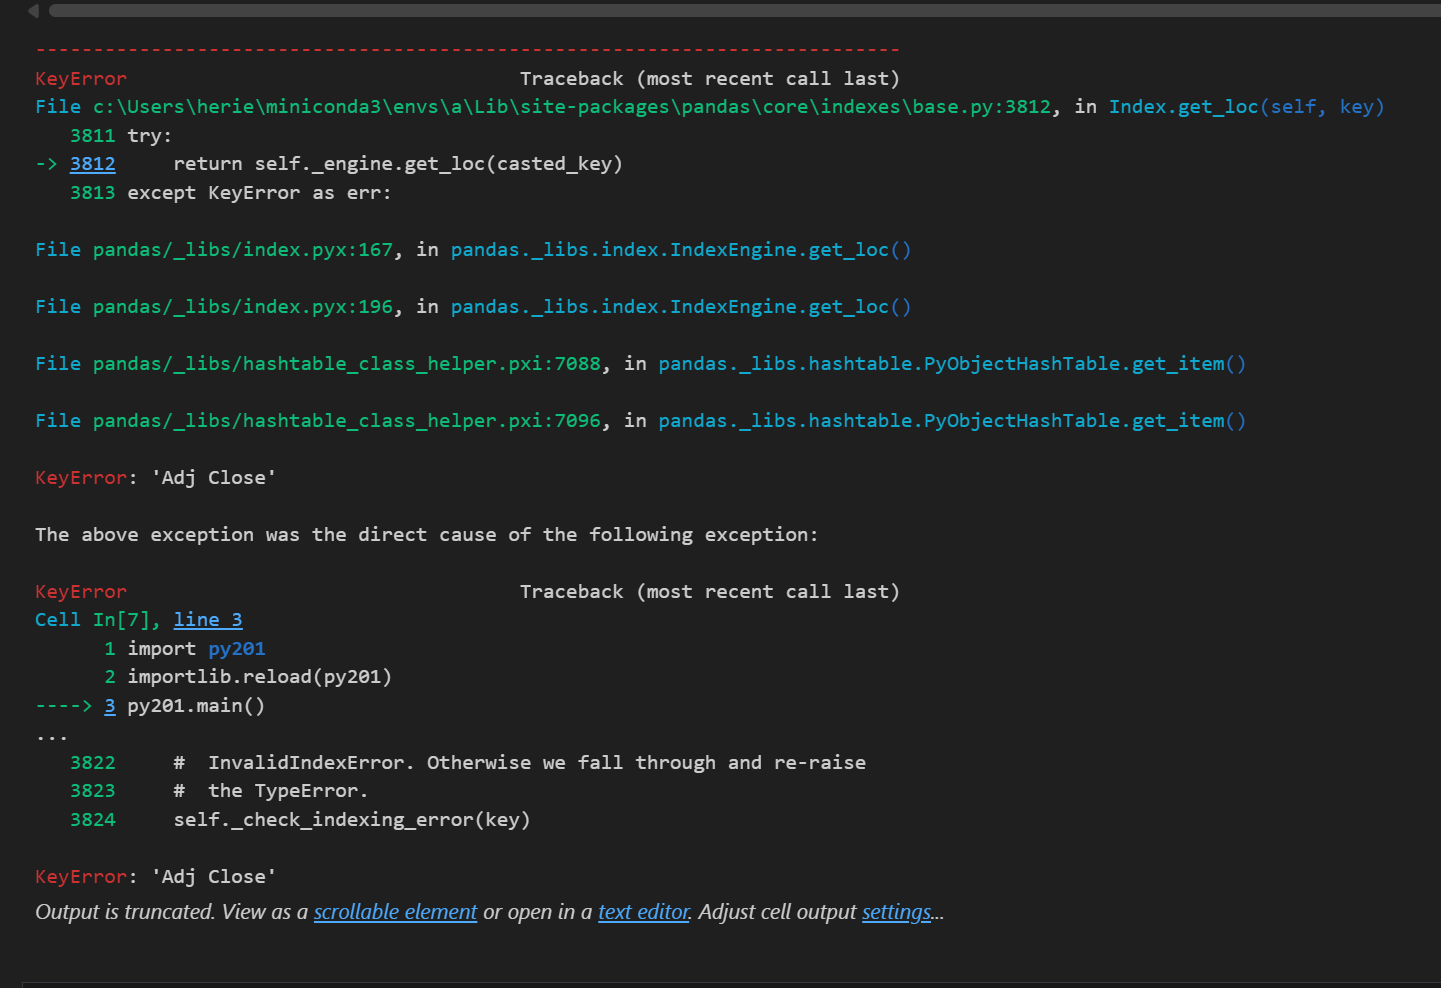

c:\Users\herie\GitHub\Proyectos\En Pausa\Estimacion de Tendencia\notebooks\201 not polynomical\py12_timeweighted.py:307: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed



[d=2] TRAIN minima:
  s≈0.001000, J_train≈6.783397e+01, RMSE_train≈8.2361, RMSE_val≈0.6180, RMSE_test≈3.4521, RMSE_train_and_val≈7.1398, RMSE_Weighted_train≈4.8481, RMSE_Weighted_val≈0.7417, RMSE_Weighted_test≈4.1398, RMSE_Weighted_train_and_val≈3.6610
  s≈0.883540, J_train≈3.069079e+00, RMSE_train≈1.7519, RMSE_val≈2.8044, RMSE_test≈10.1103, RMSE_train_and_val≈2.0658, RMSE_Weighted_train≈1.7930, RMSE_Weighted_val≈3.5622, RMSE_Weighted_test≈11.4330, RMSE_Weighted_train_and_val≈2.3558
  s≈0.971872, J_train≈7.988913e-01, RMSE_train≈0.8938, RMSE_val≈0.9045, RMSE_test≈3.6869, RMSE_train_and_val≈0.8965, RMSE_Weighted_train≈0.8728, RMSE_Weighted_val≈1.1959, RMSE_Weighted_test≈4.1528, RMSE_Weighted_train_and_val≈0.9082
  s≈0.999000, J_train≈1.545406e+00, RMSE_train≈1.2431, RMSE_val≈0.3272, RMSE_test≈0.4205, RMSE_train_and_val≈1.0890, RMSE_Weighted_train≈0.9975, RMSE_Weighted_val≈0.3351, RMSE_Weighted_test≈0.2878, RMSE_Weighted_train_and_val≈0.7791
[d=2] VAL minima:
  s≈0.118640, J_val≈3.80053

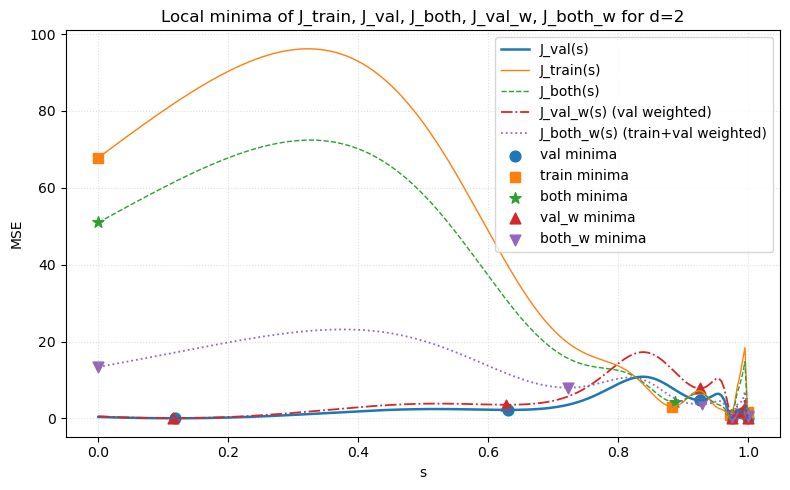

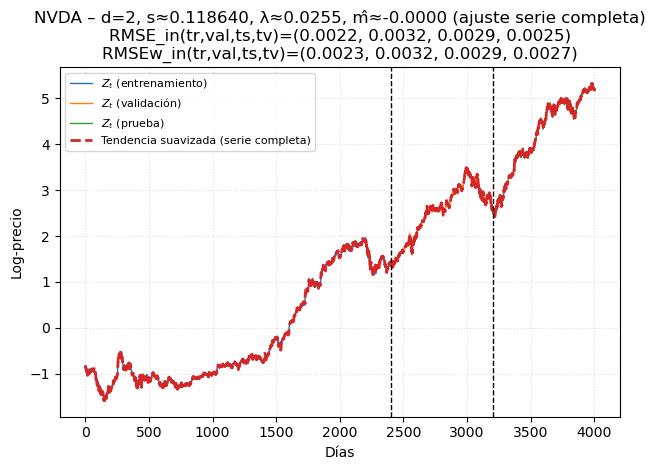

In [ ]:
from py12_timeweighted import (
    load_sp500_series,
    train_val_test_split,
    analyze_all_objectives_for_d,
    GuerreroSpectralSolver,
)
import py13 as fulls

ticker = "NVDA"
t_all, Z_all, meta = load_sp500_series(ticker=ticker, start="2010-01-01")
Z_train, Z_val, Z_test, N_train, N_val, N_test = train_val_test_split(Z_all)

d = 2
solver = GuerreroSpectralSolver(N_train, d)
res = analyze_all_objectives_for_d(
    solver=solver,
    Z_train=Z_train,
    Z_val=Z_val,
    Z_test=Z_test,
    d=d,
)
s_star_val = float(res["val"]["s"][0])  # e.g. best by validation MSE

# Now full-series smoother (non-polynomial tail), purely descriptive
fulls.plot_fullseries_split_nonpoly(
    Z_all=Z_all,
    N_train=N_train,
    N_val=N_val,
    d=d,
    s_unit=s_star_val,
    meta=meta,
    save_pdf_path="figs_fullseries",
)
